How to talk to Radio Astronomers?
=================================

Deepthi Gorthi

Graduate Student/Postdoc Seminar

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = (10, 6)

# Single Dish Telescope

Optical Astronomy *always* uses single dish telescopes- the entire light receiving surface is one aperture.
e.g. Gemini, Hubble, Keck (any optical telescope)

Radio Astronomy has some single dish telescopes like the Green Bank Observatory, Arecibo, Effelsberg Telescope, FAST.

Let's start with a single dish for either field.


## The Aperture Plane

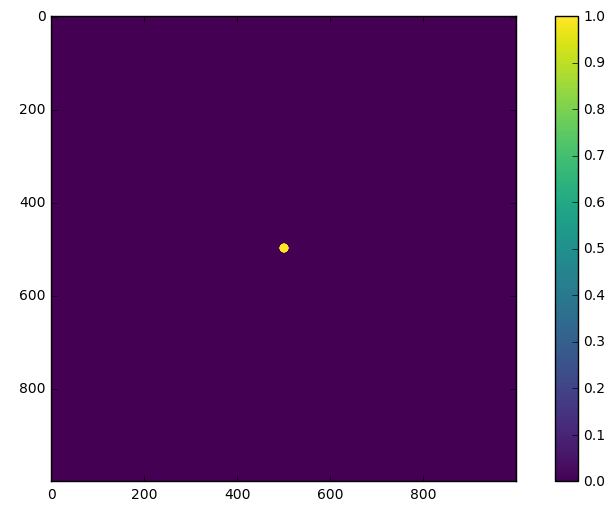

In [3]:
x,y = np.meshgrid(np.linspace(-5,5,num=1000),np.linspace(-5,5,num=1000))
f = np.sqrt(x**2+y**2)
f = f<0.1

plt.imshow(f,cmap='viridis')
plt.colorbar()

# Point Spread Function = Primary Beam response

Both optical and radio astronomers know well that a telescopes do not produce a pencil beam (unfortunately). Ignoring atmospheric effects, an optical telescope is **diffraction limited**.

Radio telescopes are always "diffraction limited". The wavelengths measured by radio telescopes are much larger than the scales the atmosphere can distort.

Assume the single dish we started with is a parabolic (mirror)reflecting surface.

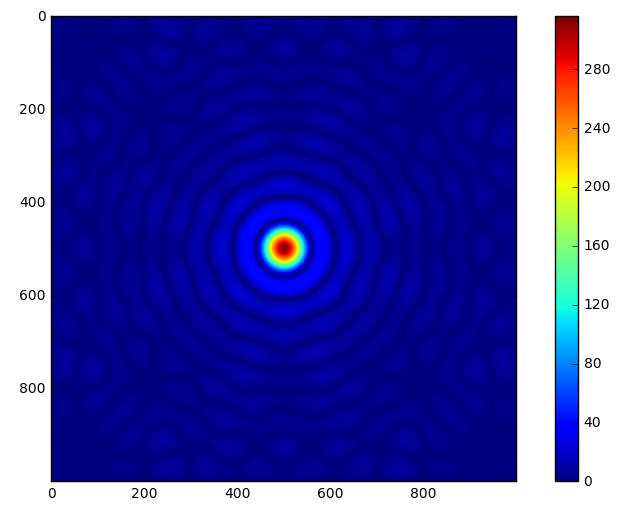

In [4]:
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.abs(F))#, norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar()

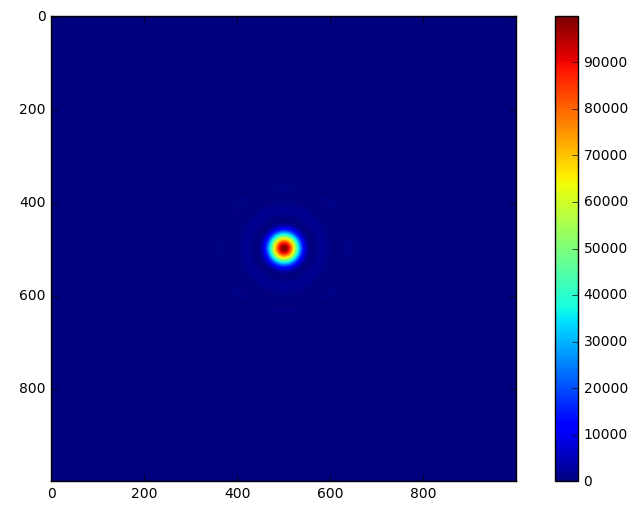

In [5]:
P = np.abs(F)**2

plt.imshow(P)
plt.colorbar()

# The Optical Transfer Function = UV Plane

In optical astronomy, the optical transfer function is the fourier transform of the point spread function (beam response).

In radio astronomy, this parameter is usually not computed for single dish telescopes but as we'll see this becomes the UV plane for interferometers.

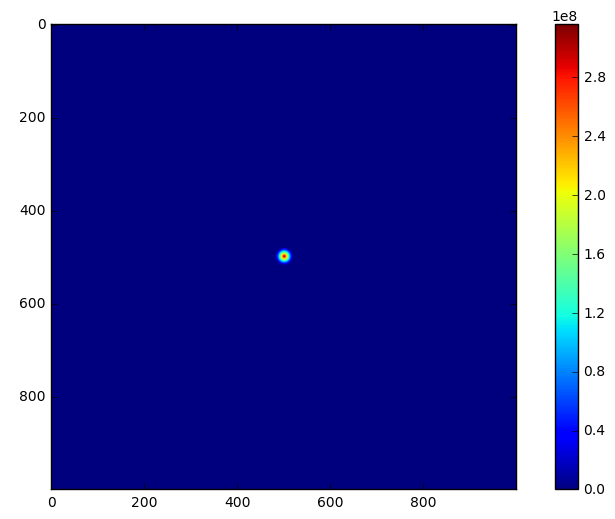

In [6]:
uv = np.fft.fftshift(np.fft.fft2(P))

plt.imshow(np.abs(uv))
plt.colorbar()

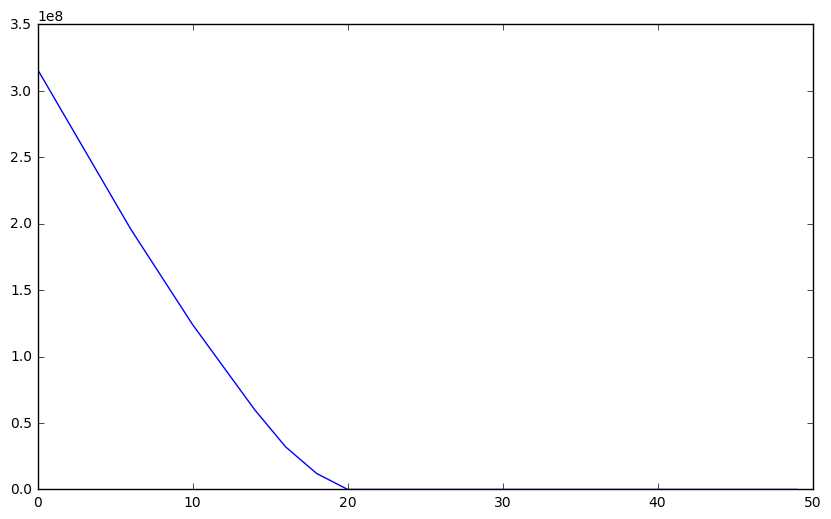

In [7]:
plt.plot(np.abs(uv[500][500:550]))

# Why Interferometers?

$$\theta \sim \frac{\lambda}{D}$$

For Hubble, say $\lambda \sim 100nm$ and $D = 2m$ $\implies$ $\theta \sim 0.01''$

To achieve similar resolution at say $\lambda \sim 10cm$, the diamter of the dish should be 2000km! 

Arecibo has a diameter of 305m and a resolution of $4'$ only. 

# Dishes are not interferometers (unfortunately!)

### Let's repeat this approach for a 4 element interferometer.

(-1, 4)

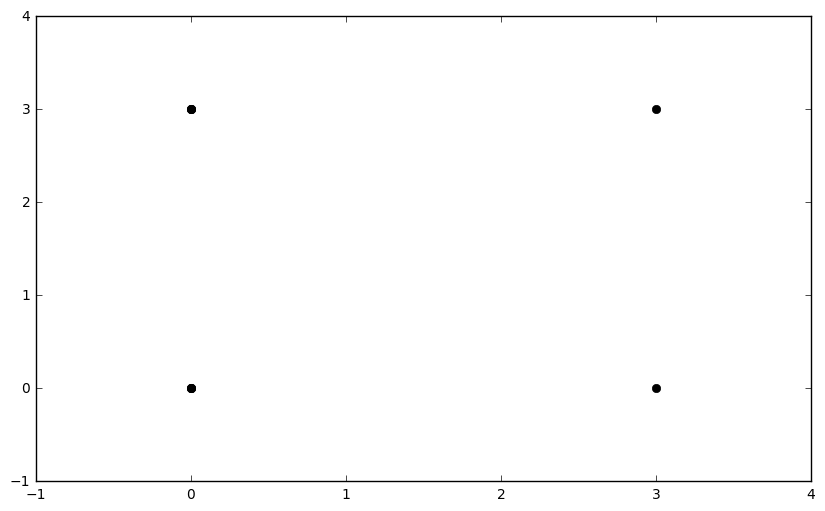

In [8]:
x,y = np.linspace(0,3,num=9,dtype=int),np.linspace(0,3,num=4,dtype=int)
ants = np.array([[1,0,0,1],list(np.zeros(4,dtype=int)),list(np.zeros(4,dtype=int)),[1,0,0,1]])
ants = np.hstack((ants,np.zeros_like(ants)));ants = np.hstack((ants,np.zeros_like(ants)))
ants = np.vstack((ants,np.zeros_like(ants)));ants = np.vstack((ants,np.zeros_like(ants)))

fig,ax = plt.subplots(1,1)
for l in x:
    for m in y:
        if ants[m][l]:
            ax.plot(l,m,'k',marker='o')
ax.set_xlim([-1,4])
ax.set_ylim([-1,4])

# UV Plane

(-5, 5)

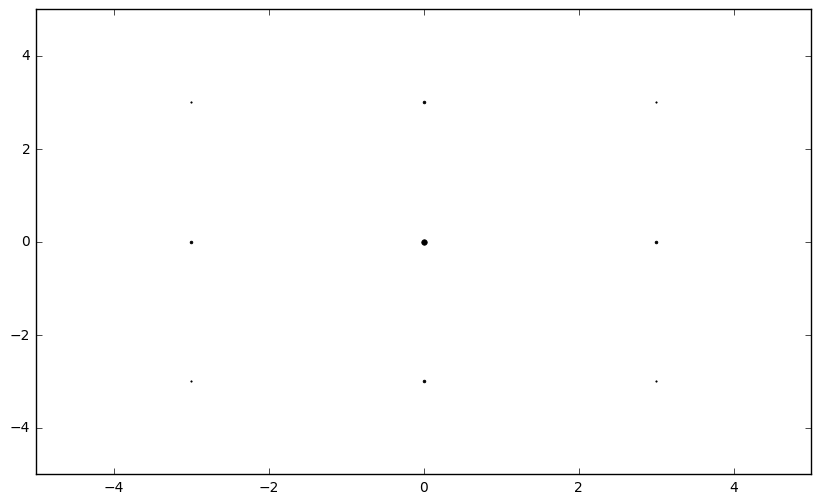

In [9]:
uv_plane = np.fft.fftshift(np.fft.ifft2(np.abs(np.fft.fft2(ants))**2))
u,v = np.shape(uv_plane)

fig,ax = plt.subplots(1,1)
for x in range(v):
    for y in range(u):
        if uv_plane[y][x]:
            ax.plot(x-8,y-8,'k',marker='o',markersize=np.abs(uv_plane[y][x]))
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

(-0.5, 8)

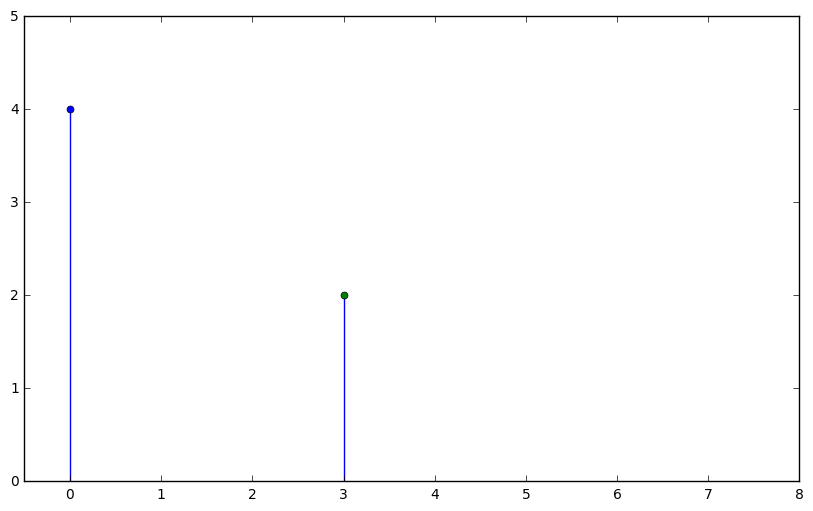

In [10]:
for x,f in enumerate(np.abs(uv_plane[8][8:])):
    if f>1:
        plt.axvline(x,ymax=float(f/5))
        plt.plot(x,f,marker='o',markersize=5)
plt.ylim([0,5])
plt.xlim([-0.5,8])

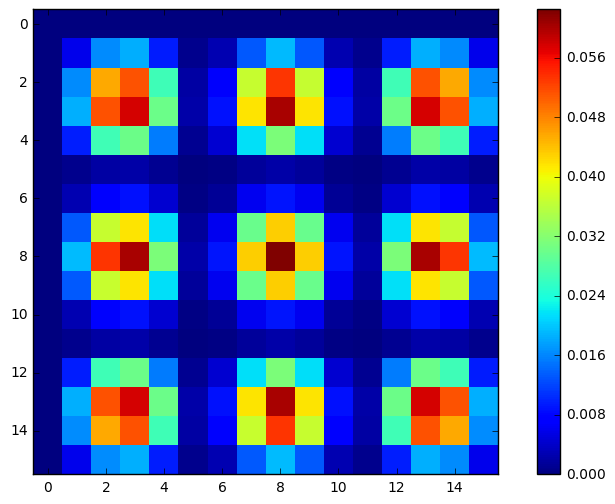

In [11]:
beams = np.fft.ifft2(uv_plane)

plt.imshow(np.abs(np.fft.fftshift(beams)),interpolation='none')#,norm=LogNorm(vmin=beams.min(), vmax=beams.max()))
plt.colorbar()

# Beams of an interferometer

A two element interferometer = Two slits of the Young's double slit experiment.

The beams on the sky are same as the interference pattern on a screen. 

# Review Ray Optics

## Interference

### Remembering the classic Young's double slit experiment

Consider a parallel beam of light of wavelength **$\lambda =$ 800 nm** falling on two infinitely thin slits, distance **d= 4 mm** apart ($\frac{\lambda}{D} \sim 0.5''$). The location of the nulls (maxima) can be computed by arguing that the path difference of the two slits should be $\lambda/2$ ($\lambda$). Therefore, for the nulls

$$d\sin\theta = \left(m+\frac{1}{2}\right)\lambda\qquad m=\pm1,\pm2,\pm3..$$

The intensity of the fringes on a screen at a distance $y >> d$ away can be computed by adding the electric field vectors coherently. The electric field due to the two slits at an arbitrary location P can be written as follows, assuming they are both propagating in the same direction.

$$ E_1 = E_0\sin(kx+\omega t)\qquad E_2 = E_0\sin(kx+\omega t+\phi)$$


$$I \propto (\mathbf{E_1} + \mathbf{E_2})^2$$

$$I = I_0 \cos^2 \left(\frac{\pi d \sin \theta}{\lambda}\right)$$

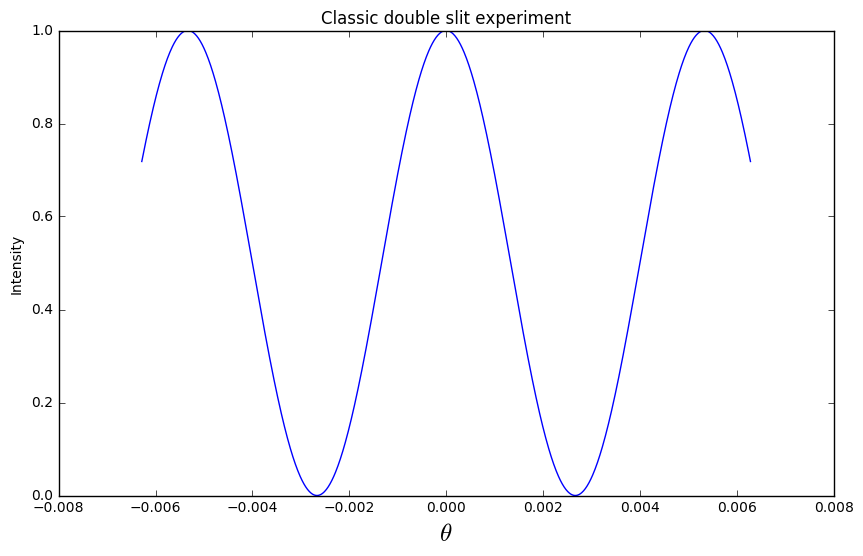

In [12]:
theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
d = 0.15e-3 #m
wv = 800e-9 #m 
I = (np.cos(np.pi*d*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Classic double slit experiment' )

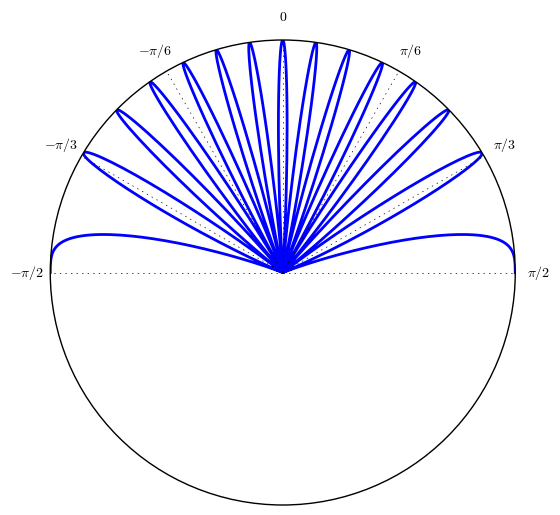

In [13]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
# With HERA specs (in cm)
wv = 200
d = 1400
I1 = (np.cos(np.pi*d*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I1,lw=2,label=r'$\lambda = 210$')

## Changing distance of separation and wavelength has the exact same effect it has in Young's Double Slit Experiment.

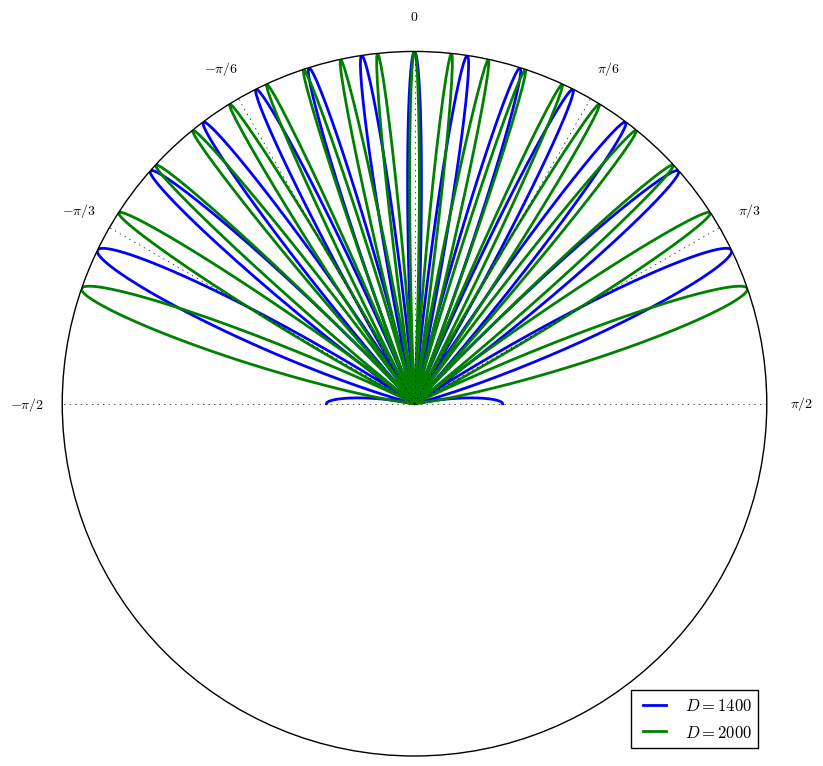

In [14]:
plt.rcParams['figure.figsize'] = (20, 12)
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = [210, 250, 300]
d = [1400,2000]
I = {}
for bl in d:
    I[bl] = {}
    for l in wv:
        I[bl][l] = (np.cos(np.pi*bl*np.sin(theta)/l))**2

ax = plt.subplot(121,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
for bl in d:
    ax.plot(theta,I[bl][wv[0]],lw=2,label=r'$D = %d$'%bl)
ax.legend(loc=4)

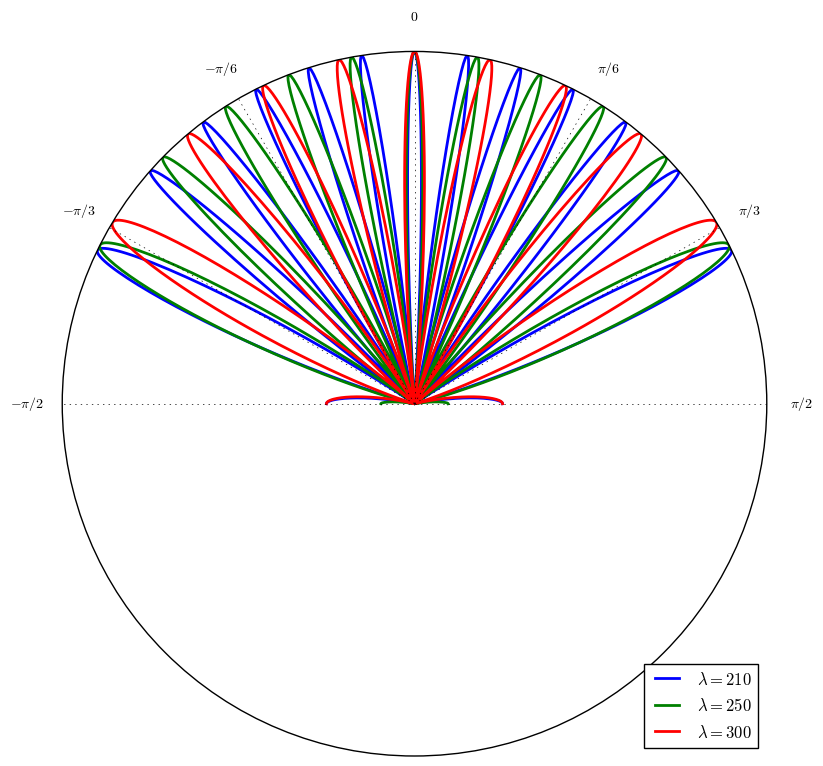

In [15]:
ax1 = plt.subplot(122,projection='polar')
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax1.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax1.set_yticks([])
ax1.set_yticklabels([])
for l in wv:
    ax1.plot(theta,I[d[0]][l],lw=2,label=r'$\lambda = %d$'%l)
ax1.legend(loc=4)

# Diffraction: Slits have a Finite Width

## Single Slit diffraction

$$I = I_0 \text{sinc}^2\left(\frac{\pi w sin \theta}{\lambda}\right)$$

Note the scales of theta (x axis) in all the plots. Interference is visible in large k modes (high spatial frequency) or small angular scales. Diffraction is evident is small k modes (low spatial frequency) or large angular scales.

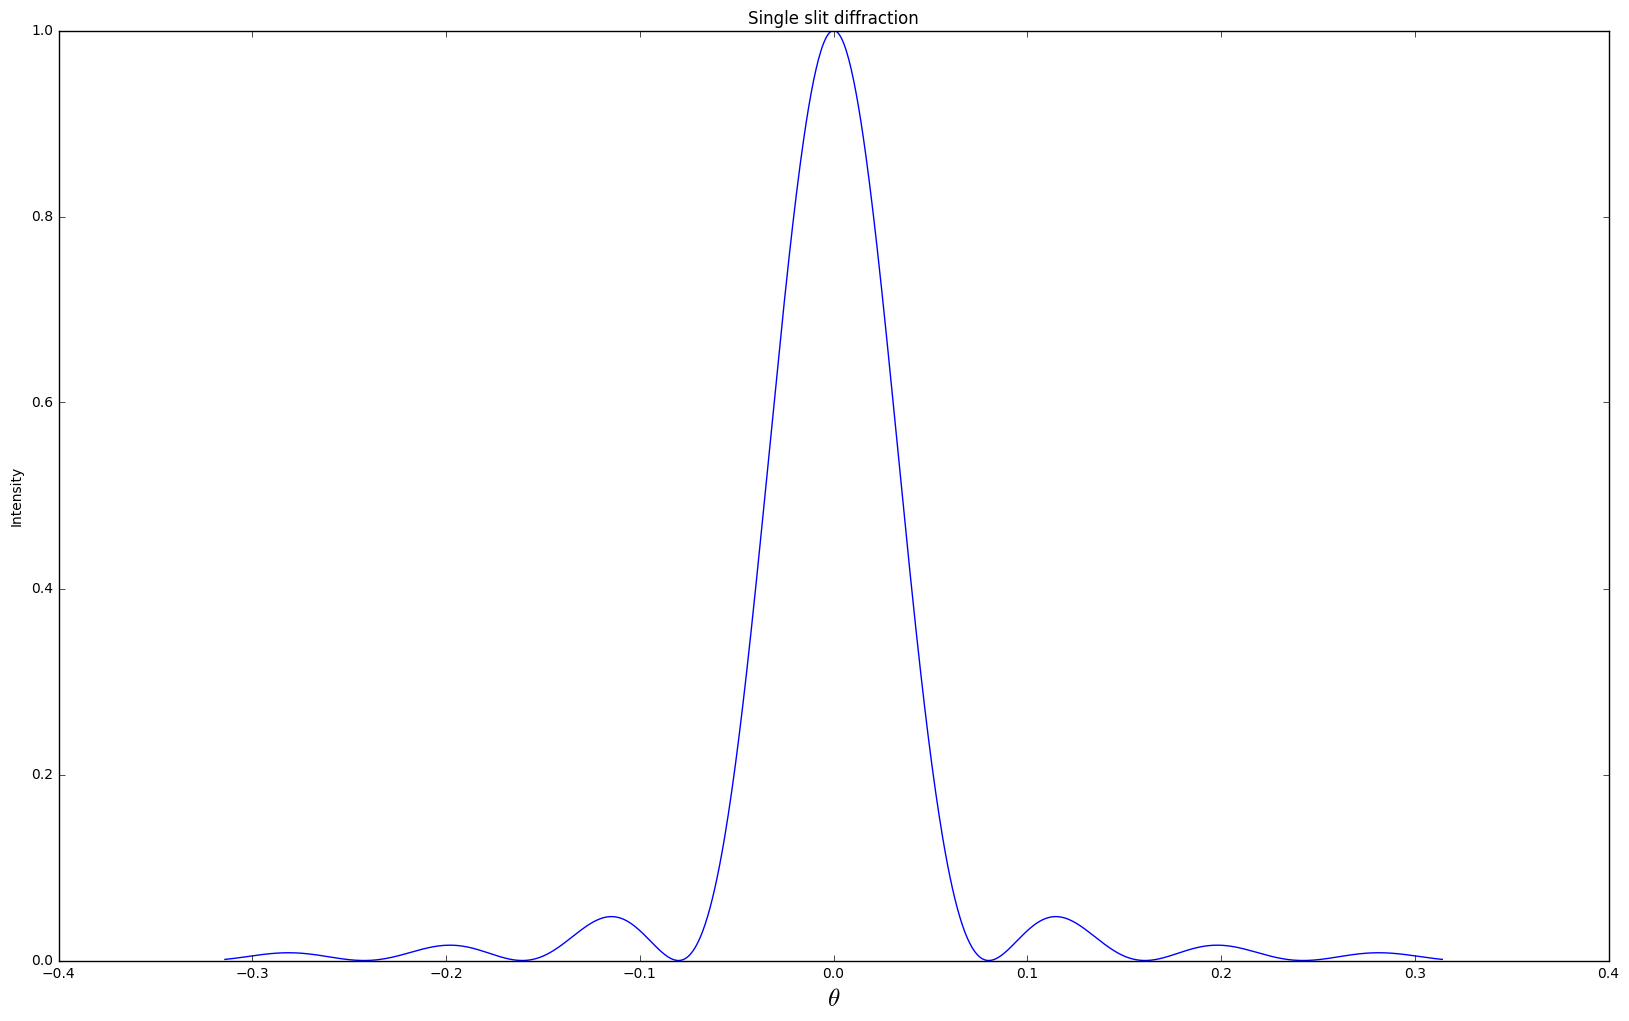

In [16]:
# Diffraction with single slit
theta = np.linspace(-np.pi/10,np.pi/10,num=1000)
wv = 800e-9 #m #d/wv ~ 200
a = 0.01e-3
I = (np.sinc(a*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Single slit diffraction')

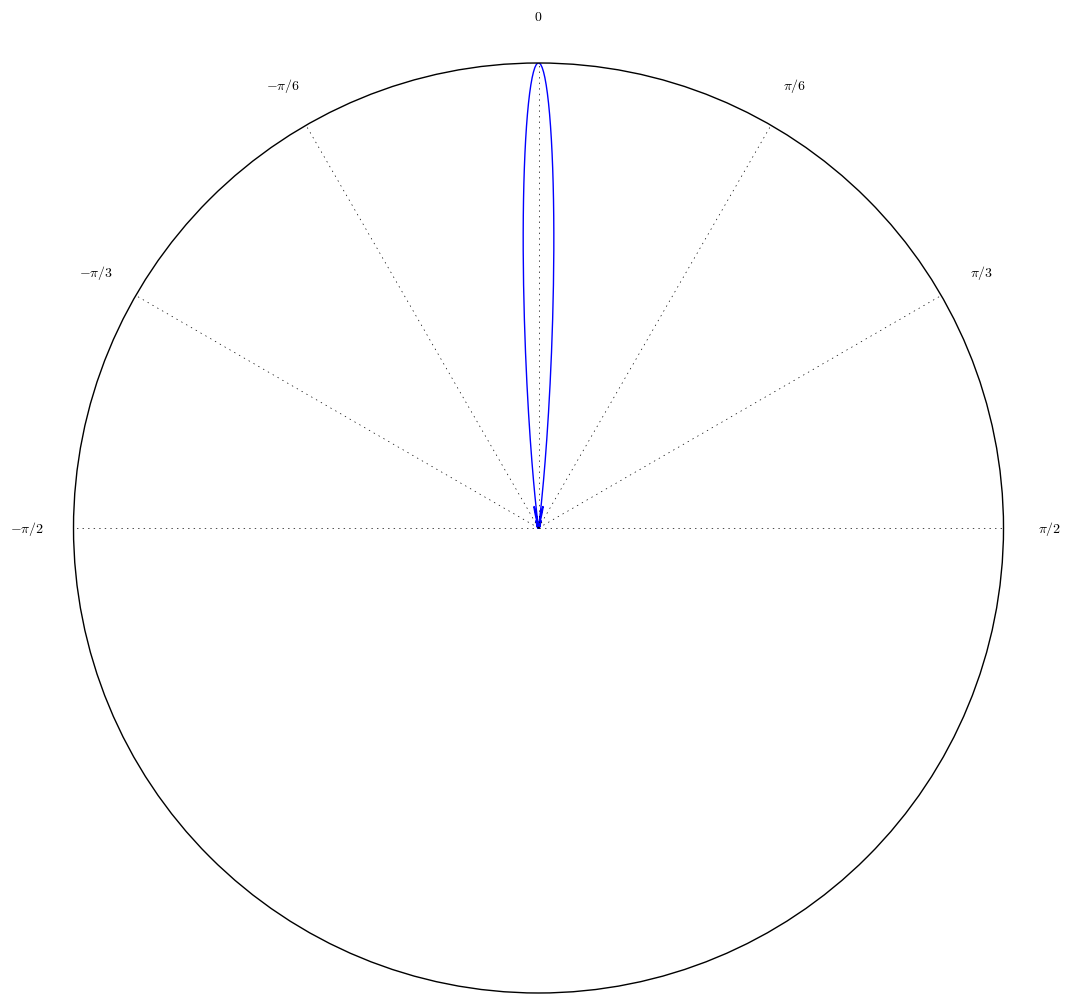

In [17]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = 200
a = 1400
I = (np.sinc(a*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)

# Primary beam modulates interference pattern

## Finite width N slit interference

In the most generalised case, we have N slits all with finite width causing both interference and diffraction. The output intensity in this case is given by product of the diffraction pattern and the interference pattern- the diffraction pattern modulates the interference (since diffraction is caused by smaller spatial scales, they effect the larger modes).

$$I = I_0 \frac{\sin^2\left(\frac{N\phi}{2}\right)}{\sin^2\left(\frac{\phi}{2}\right)}\text{sinc}^2\left(\frac{\delta}{2}\right)$$

$$\phi = \frac{2\pi d \sin \theta}{\lambda}$$
$$\delta = \frac{2\pi w \sin \theta}{\lambda}$$

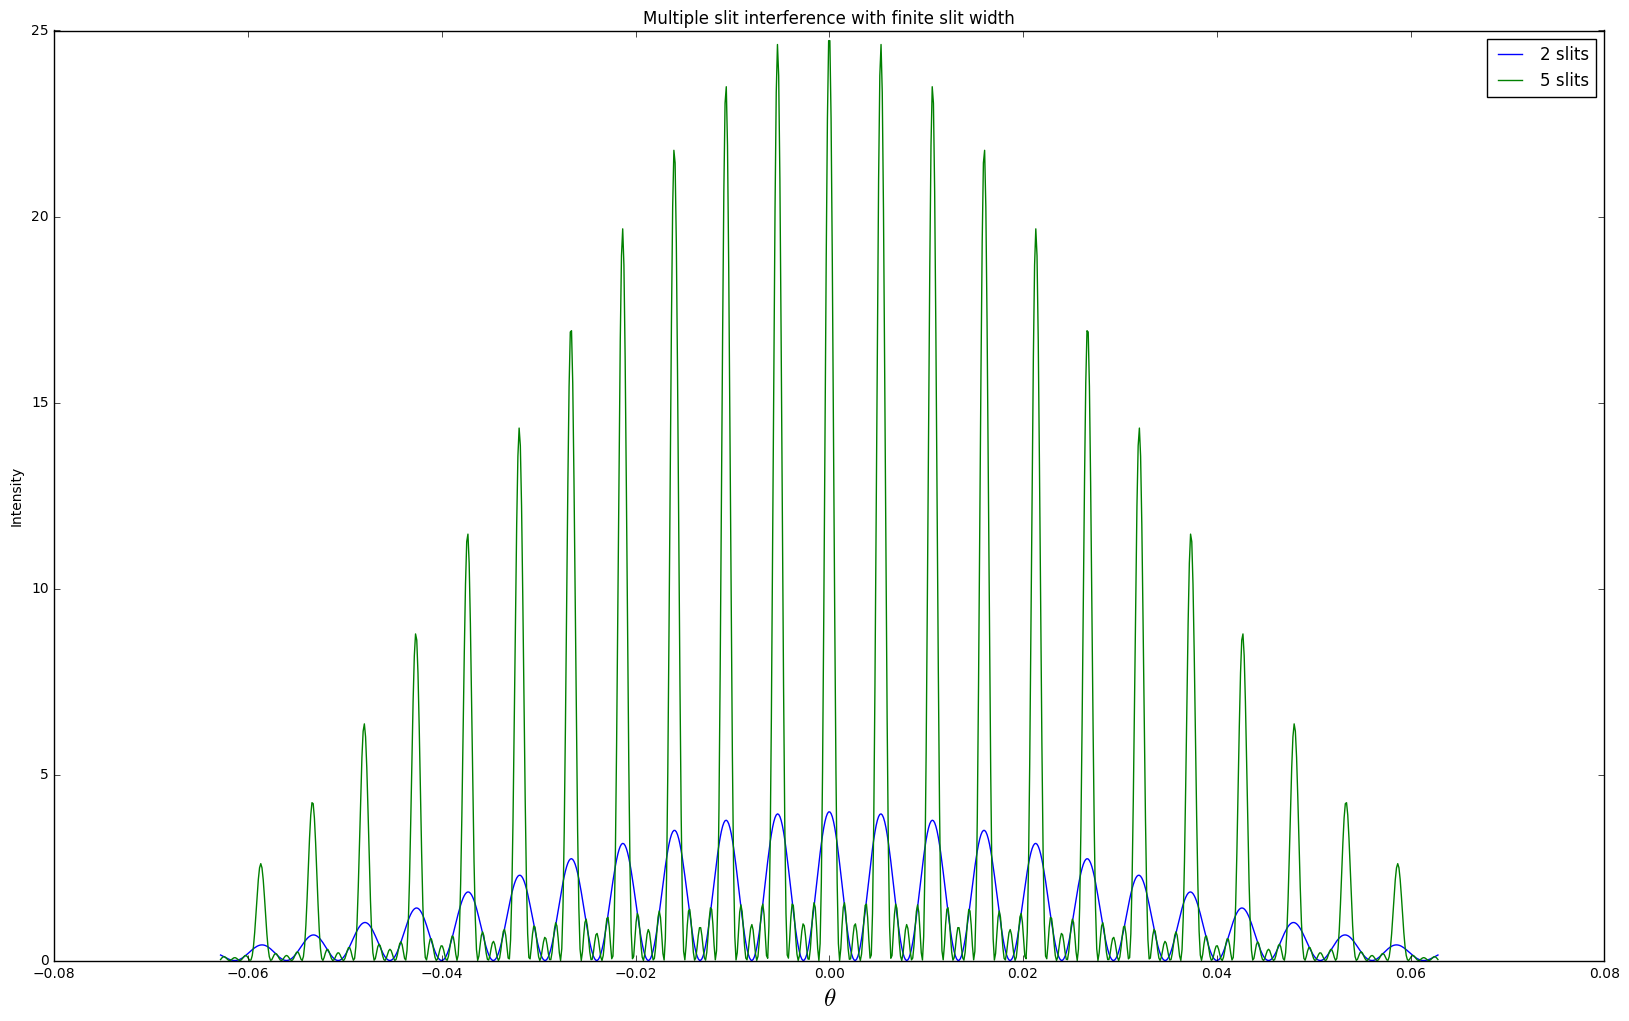

In [18]:
# Interference with finite slit width
theta = np.linspace(-np.pi/50,np.pi/50,num=1000)
wv = 800e-9 #m 
a = 0.01e-3 #m
d = 0.15e-3 #m
phi = np.pi*d*np.sin(theta)/wv

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Multiple slit interference with finite slit width')

for N in [2,5]: 
    I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
    ax.plot(theta,I,label='%d slits'%N)
ax.legend()

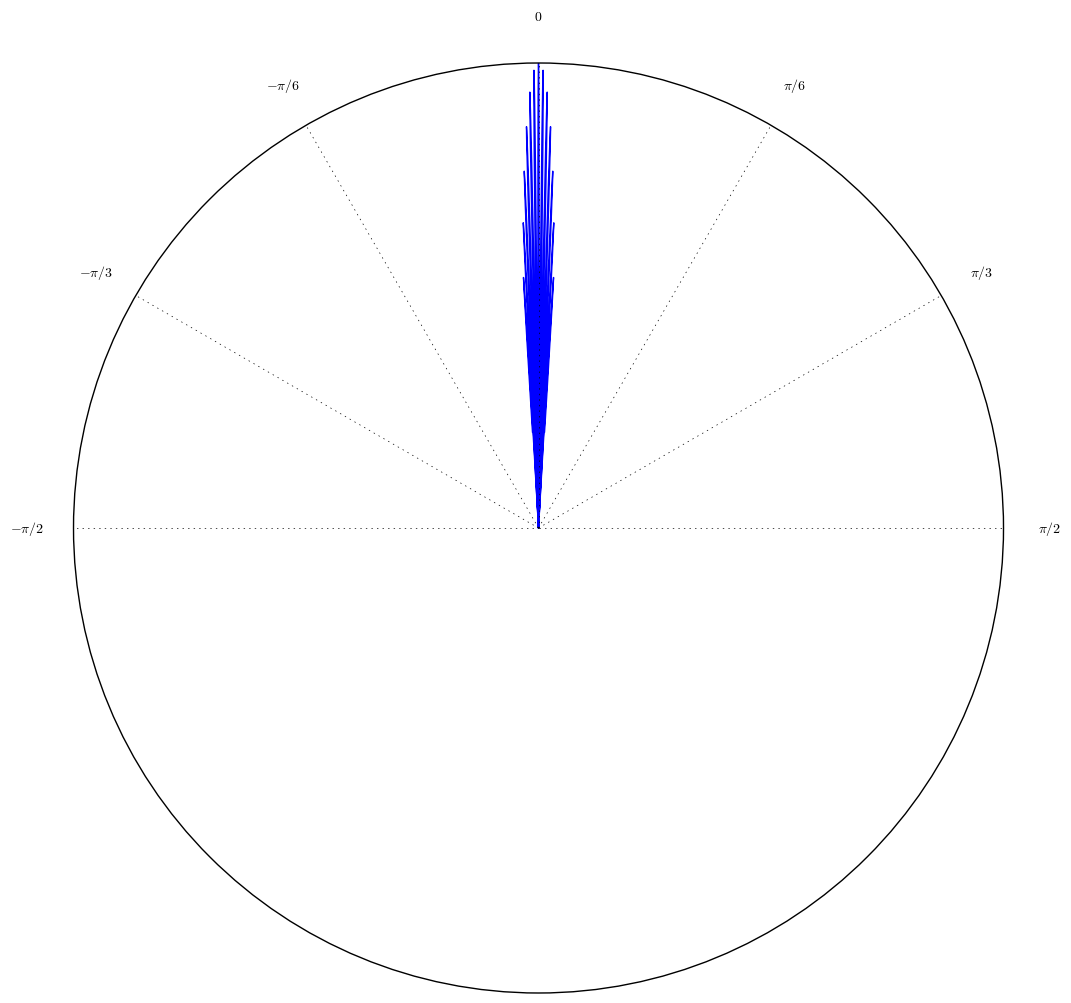

In [19]:
# Interference with finite slit width
theta = np.linspace(-np.pi/50,np.pi/50,num=1000)
wv = 200 #cm 
a = 1400 #cm
d = 20000 #cm
phi = np.pi*d*np.sin(theta)/wv
N = 2 #no. of slits
I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2 

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)

# PSF (Beam Response) of Interferometer

The moral of the previous story was that the PSF of an interferometer is not just the fourier transform of the UV Plane. It is the UV plane convolved with the PSF of a single dish.

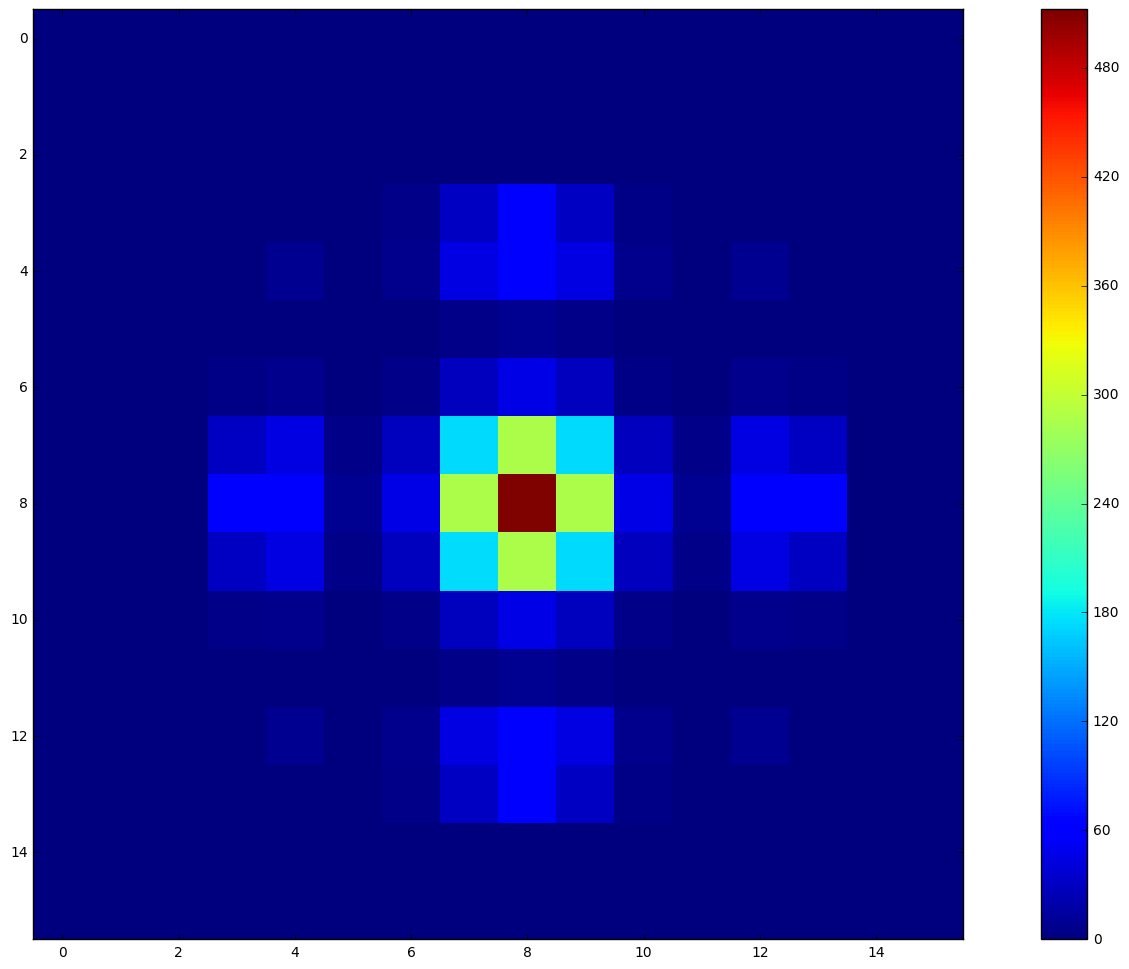

In [20]:
# Aperture
x,y = np.meshgrid(np.linspace(-5,5,num=16),np.linspace(-5,5,num=16))
f = np.sqrt(x**2+y**2)
f = f<2

#PSF
F = np.fft.fftshift(np.fft.fft2(f))
PSF = np.abs(F)**2 

uv_plane = np.fft.fftshift(np.fft.ifft2(np.abs(np.fft.fft2(ants))**2))
uv = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(uv_plane)*np.fft.fft2(PSF)))

beams = np.fft.ifft2(uv)

plt.imshow(np.abs(np.fft.fftshift(beams)),interpolation='none')
plt.colorbar()